<a href="https://colab.research.google.com/github/aliasghar-10/Python-Project-4-Assignments/blob/main/Assignments%2000%20to%2005/02_lists/03_Erase_Canvas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Erase Canvas Project**

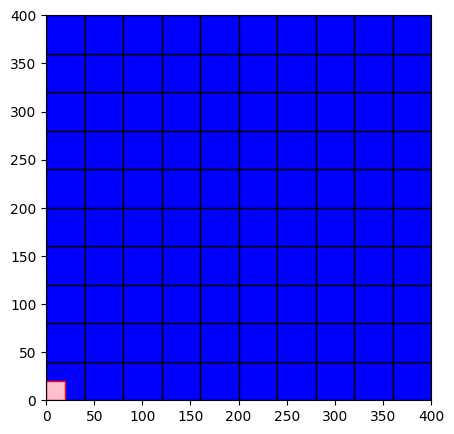

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.widgets import Button

# Constants
CANVAS_WIDTH = 400
CANVAS_HEIGHT = 400
CELL_SIZE = 40
ERASER_SIZE = 20

class CanvasApp:
    def __init__(self):
        self.fig, self.ax = plt.subplots()
        self.fig.set_size_inches(5, 5)
        self.ax.set_xlim(0, CANVAS_WIDTH)
        self.ax.set_ylim(0, CANVAS_HEIGHT)
        self.ax.set_aspect('equal')
        self.grid = []
        self.eraser = None
        self.init_canvas()
        self.dragging = False
        self.connect_events()
        plt.show()

    def init_canvas(self):
        # Create a grid of blue cells
        for x in range(0, CANVAS_WIDTH, CELL_SIZE):
            for y in range(0, CANVAS_HEIGHT, CELL_SIZE):
                rect = patches.Rectangle((x, y), CELL_SIZE, CELL_SIZE, facecolor='blue', edgecolor='black')
                self.ax.add_patch(rect)
                self.grid.append(rect)

        # Create the eraser
        self.eraser = patches.Rectangle((0, 0), ERASER_SIZE, ERASER_SIZE, facecolor='pink', edgecolor='red')
        self.ax.add_patch(self.eraser)

    def connect_events(self):
        self.fig.canvas.mpl_connect('motion_notify_event', self.on_mouse_move)
        self.fig.canvas.mpl_connect('button_press_event', self.on_mouse_down)
        self.fig.canvas.mpl_connect('button_release_event', self.on_mouse_up)

    def on_mouse_down(self, event):
        self.dragging = True

    def on_mouse_up(self, event):
        self.dragging = False

    def on_mouse_move(self, event):
        if self.dragging and event.xdata and event.ydata:
            # Move the eraser to the mouse position
            self.eraser.set_xy((event.xdata - ERASER_SIZE / 2, event.ydata - ERASER_SIZE / 2))

            # Erase overlapping cells
            for rect in self.grid:
                if self.rect_overlap(rect, self.eraser):
                    rect.set_facecolor('white')

            self.fig.canvas.draw_idle()

    def rect_overlap(self, rect1, rect2):
        # Check if two rectangles overlap
        x1, y1 = rect1.get_xy()
        x2, y2 = rect2.get_xy()
        return not (
            x1 + CELL_SIZE <= x2 or
            x2 + ERASER_SIZE <= x1 or
            y1 + CELL_SIZE <= y2 or
            y2 + ERASER_SIZE <= y1
        )

# Run the app
CanvasApp()
